In [ ]:
import pandas as pd
video_classifications_metadata = pd.read_csv(r'D:\Users\Neuro\City College Dropbox\NIKHIL KUPPA\youtube_video_tagging\youtube_project\verify_annotations_tool\notebooks\video_classifications_metadata.tsv', sep='\t', index=False)

In [ ]:
video_classifications_metadata = video_classifications_metadata[(video_classifications_metadata['duration'] > 180) & (video_classifications_metadata['duration'] < 900)]

In [108]:
required_format_labels = video_classifications_metadata['format_map1'].dropna().unique()
required_content_labels = video_classifications_metadata['content_map1'].dropna().unique()

In [324]:
df = video_classifications_metadata.dropna(subset=['format_map1', 'content_map1', 'url'])
df

,title,url,duration,Video,content1,content_map1,content_map_hierarchy1,content_map_hierarchy_upper1,format1,format_map1,format_map_hierarchy1,content2,content_map2,content_map_hierarchy2,content_map_hierarchy_upper2,format2,format_map2,format_map_hierarchy2
1,'The Crown' Sets Explained by the Show's Set D...,https://www.youtube.com/watch?v=OiIxePlKZ1A,679.0,Architectural_Digest_OiIxePlKZ1A,edu.arts.architecture,Architecture,Architecture,Education,docustyle,Documentary,Documentary Style (Mixed Format),edu.arts.arthistory,Arts,Arts & Culture,Education,talkinghead.frameregular,Talking Head - Center,Single Presenter
3,(Architecture) Conferences. Why Bother?,https://www.youtube.com/watch?v=ZaOz01VaSBg,329.0,30X40_Design_Workshop_ZaOz01VaSBg,edu.arts.architecture,Architecture,Architecture,Education,docustyle,Documentary,Documentary Style (Mixed Format),growth.careerdevelopment,Personal Development,Personal Development,Lifestyle & Wellbeing,talkinghead.frameregular,Talking Head - Center,Single Presenter
4,(Large) Sliding Doors - An Architect's Review,https://www.youtube.com/watch?v=kuOc_u-3tgw,569.0,30X40_Design_Workshop_kuOc_u-3tgw,edu.arts.architecture,Architecture,Architecture,Education,docustyle,Documentary,Documentary Style (Mixed Format),edu.arts.languages,Languages,Languages,Education,talkinghead.framecorner,Talking Head - Corner,Single Presenter
5,1-Hour Bedroom Redesign For Better Sleep | Roo...,https://www.youtube.com/watch?v=p7sPNyq6_38,631.0,Architectural_Digest_p7sPNyq6_38,edu.stem.engineering.civil,Engineering,Engineering,Education,talkinghead.frameregular,Talking Head - Center,Single Presenter,lifestyle.style.fashion,Beauty & Fashion,Beauty & Fashion,Lifestyle & Wellbeing,docustyle,Documentary,Documentary Style (Mixed Format)
8,100K (Silver Play Button) + A Thank You,https://www.youtube.com/watch?v=1tkK5qls78E,199.0,30X40_Design_Workshop_1tkK5qls78E,edu.arts.architecture,Architecture,Architecture,Education,talkinghead.frameregular,Talking Head - Center,Single Presenter,growth.motivational,Personal Development,Personal Development,Lifestyle & Wellbeing,writing.hand,Writing Hand (No head visible),Instructional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124279,Your Self Care in 5 Easy Steps!,https://www.youtube.com/watch?v=wiu021hKLSE,343.0,Kati_Morton_wiu021hKLSE,wellbeing.mentalhealth,Mental Health,Mental Health,Lifestyle & Wellbeing,talkinghead.frameregular,Talking Head - Center,Single Presenter,wellbeing.fitness,Fitness,Fitness & Nutrition,Lifestyle & Wellbeing,vlog,Selfie Camera (Vlog),Video Journal (Vlogs)
124280,are YOU too attached to your therapist?,https://www.youtube.com/watch?v=AKAiq1nMKgc,826.0,Kati_Morton_AKAiq1nMKgc,wellbeing.mentalhealth,Mental Health,Mental Health,Lifestyle & Wellbeing,talkinghead.frameregular,Talking Head - Center,Single Presenter,edu.medicine.psychiatry,Medicine,Medical Sciences,Education,vlog,Selfie Camera (Vlog),Video Journal (Vlogs)
124281,are you scared to set boundaries with your fam...,https://www.youtube.com/watch?v=EDqUOdIN7uY,558.0,Kati_Morton_EDqUOdIN7uY,wellbeing.mentalhealth,Mental Health,Mental Health,Lifestyle & Wellbeing,talkinghead.frameregular,Talking Head - Center,Single Presenter,edu.social.psychology,Psychology,Social Sciences,Education,vlog,Selfie Camera (Vlog),Video Journal (Vlogs)
124282,coming clean about exercise addiction and body...,https://www.youtube.com/watch?v=m-Ov1uV3izU,777.0,Kati_Morton_m-Ov1uV3izU,wellbeing.mentalhealth,Mental Health,Mental Health,Lifestyle & Wellbeing,talkinghead.frameregular,Talking Head - Center,Single Presenter,vlog.daily,Travel/Daily-life,Video journals (Eg: Vlogs),Entertainment,vlog,Selfie Camera (Vlog),Video Journal (Vlogs)


⚠️ No more videos can be added without violating label max caps


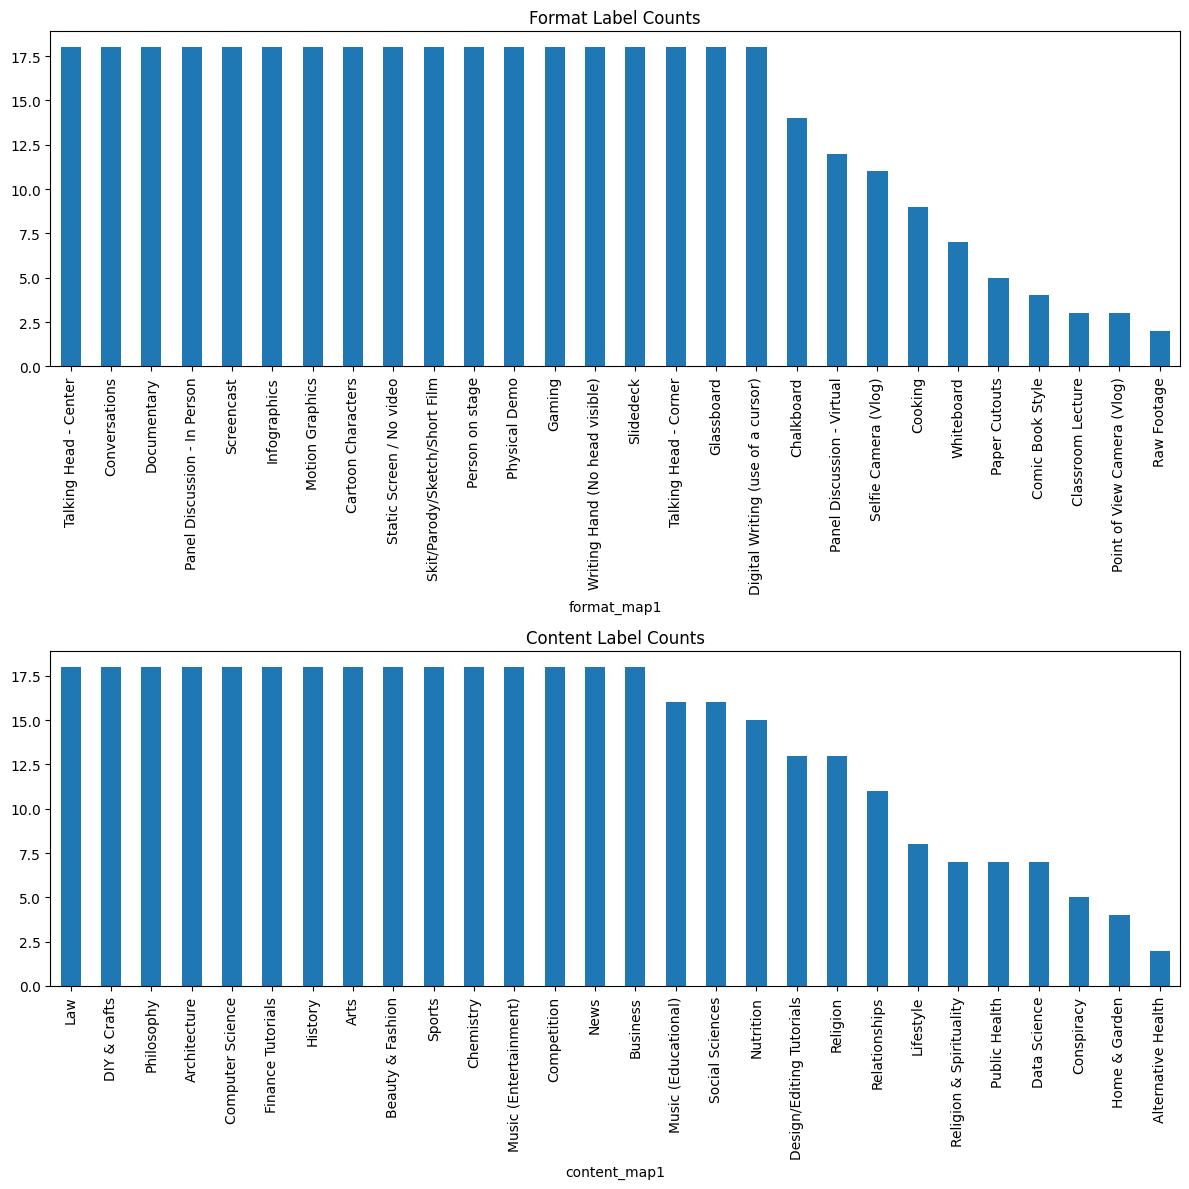

✅ Selected exactly 394 videos
format::Talking Head - Center  — count: 18, min: 2, max allowed: 18
content::Religion              — count: 13, min: 2, max allowed: 18
format::Conversations          — count: 18, min: 2, max allowed: 18
content::Law                   — count: 18, min: 2, max allowed: 18
format::Paper Cutouts          — count: 5, min: 2, max allowed: 18
content::DIY & Crafts          — count: 18, min: 2, max allowed: 18
format::Documentary            — count: 18, min: 2, max allowed: 18
content::Philosophy            — count: 18, min: 2, max allowed: 18
content::News                  — count: 18, min: 2, max allowed: 18
content::Computer Science      — count: 18, min: 2, max allowed: 18
content::Finance Tutorials     — count: 18, min: 2, max allowed: 18
format::Infographics           — count: 18, min: 2, max allowed: 18
content::History               — count: 18, min: 2, max allowed: 18
format::Motion Graphics        — count: 18, min: 2, max allowed: 18
content::Music (Edu

In [ ]:
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

seen_videos = set()  # Replace with: set(subset_df['Video'].tolist()) if subset_df is available


# Configuration
min_content = 2
min_format = 2
movie_penalty = 1
target_total = 500
label_max_multiplier = 9.35  # Don't exceed 1.5 * quota during diversity fill

preferred_formats  = {
    "Chalkboard", "Glassboard", "Panel Discussion - In Person",
    "Static Screen / No video", "Slidedeck", "Writing Hand (No head visible)"
}

allowed_contents = {
    "News", "Sports", "Law", "Architecture", "Computer Science", "Nutrition",
    "Religion", "Finance Tutorials", "Chemistry", "DIY & Crafts",
    "Music (Entertainment)", "History", "Conspiracy", "Beauty & Fashion",
    "Arts", "Competition", "Business", "Social Sciences", "Travel/Daily-life",
    "Relationships", "Data Science", "Music (Educational)",
    "Design/Editing Tutorials", "Public Health", "Alternative Health",
    "Religion & Spirituality", "Philosophy", "Lifestyle", "Home & Garden"
}

# Drop NAs and only include allowed format/content, and not already used videos
df = video_classifications_metadata.dropna(subset=['format_map1', 'content_map1', 'url'])
df = df[
    df['content_map1'].isin(allowed_contents) &
    ~df['Video'].isin(seen_videos)
].copy()

df['channel'] = df['Video'].str[:-12]
df = df.sample(frac=1).reset_index(drop=True)

# === STEP 1: Build mappings ===
label_to_videos = defaultdict(set)
video_to_labels = {}

for idx, row in df.iterrows():
    labels = []
    if pd.notna(row['format_map1']):
        labels.append(f'format::{row["format_map1"]}')
    if pd.notna(row['content_map1']):
        labels.append(f'content::{row["content_map1"]}')
    video_to_labels[idx] = labels
    for label in labels:
        label_to_videos[label].add(idx)

# === STEP 2: Define label quotas ===
label_quota = {}
for label in label_to_videos:
    if label.startswith('format::'):
        label_quota[label] = min_format
    elif label.startswith('content::Movies'):
        label_quota[label] = movie_penalty
    else:
        label_quota[label] = min_content

label_max = {k: int(label_max_multiplier * v) for k, v in label_quota.items()}

# === STEP 3: Greedy selection to meet minimum quotas ===
selected_videos = set()
label_counts = Counter()

def can_add_video_min_phase(vid):
    # Only select if at least one label is still under quota
    for label in video_to_labels[vid]:
        if label in label_quota and label_counts[label] < label_quota[label]:
            return True
    return False

while True:
    needed_labels = [label for label, count in label_counts.items() if count < label_quota[label]]
    if not needed_labels:
        break

    video_scores = {}
    for vid in video_to_labels:
        if vid in selected_videos or df.loc[vid, 'Video'] in seen_videos:
            continue
        if not can_add_video_min_phase(vid):
            continue
        score = sum(label_counts[label] < label_quota[label] for label in video_to_labels[vid])
        if score > 0:
            video_scores[vid] = score

    if not video_scores:
        print("⚠️ Cannot satisfy all quotas from available data")
        break

    # Choose video that helps least-covered labels
    best_video = max(video_scores, key=lambda vid: sum(
        (label_quota[lbl] - label_counts[lbl]) / len(label_to_videos[lbl])
        for lbl in video_to_labels[vid]
        if lbl in label_quota and label_counts[lbl] < label_quota[lbl]
    ))

    selected_videos.add(best_video)
    for label in video_to_labels[best_video]:
        label_counts[label] += 1

# === STEP 4: Diversity pass to reach exactly 220 videos ===
def can_add_video_diversity(vid):
    if vid in selected_videos or df.loc[vid, 'Video'] in seen_videos:
        return False
    for label in video_to_labels[vid]:
        if label in label_max and label_counts[label] >= label_max[label]:
            return False
    return True

def diversity_score(vid):
    labels = video_to_labels[vid]
    score = 0
    for label in labels:
        if label_counts[label] == 0:
            score += 5
        elif label_counts[label] < label_quota[label]:
            score += 3
        elif label_counts[label] < label_max[label]:
            score += 1

    # Prefer formats in the preferred list
    format_label = df.loc[vid, 'format_map1']
    if format_label in preferred_formats:
        score += 2

    return score

while len(selected_videos) < target_total:
    candidate_videos = [vid for vid in video_to_labels if can_add_video_diversity(vid)]
    if not candidate_videos:
        print("⚠️ No more videos can be added without violating label max caps")
        break

    best_video = max(candidate_videos, key=diversity_score)
    selected_videos.add(best_video)
    for label in video_to_labels[best_video]:
        label_counts[label] += 1

# === STEP 5: Final subset and histogram ===
subset_df2 = df.loc[list(selected_videos)]

def plot_histogram(subset_df):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    subset_df['format_map1'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=axs[0], title='Format Label Counts')
    subset_df['content_map1'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=axs[1], title='Content Label Counts')
    plt.tight_layout()
    plt.show()

plot_histogram(subset_df2)

# Final check
print(f"✅ Selected exactly {len(subset_df2)} videos")
for label, quota in label_quota.items():
    count = sum(label in video_to_labels[vid] for vid in selected_videos)
    print(f"{label:<30} — count: {count}, min: {quota}, max allowed: {label_max[label]}")


In [219]:
subset_df2.to_csv(r'D:\Users\Neuro\City College Dropbox\NIKHIL KUPPA\youtube_video_tagging\youtube_project\verify_annotations_tool\app-v2\data\metadata_sample_test2.tsv', sep='\t', index=False)

In [297]:
reviewed_vids1 = pd.read_csv(r'D:\Users\Neuro\City College Dropbox\NIKHIL KUPPA\youtube_video_tagging\youtube_project\verify_annotations_tool\app-v2\data\annotation_reviews.tsv', sep='\t')
reviewed_vids2  = pd.read_csv(r'D:\Users\Neuro\City College Dropbox\NIKHIL KUPPA\youtube_video_tagging\youtube_project\verify_annotations_tool\app-v2\data\annotation_reviews2.tsv', sep='\t')
reviewed_vids = pd.concat([reviewed_vids1, reviewed_vids2]).reset_index(drop=True)

add_vids = ['Jeff_Su_k3tk9IbLJok',
'Engineering_Explained_6ySK6XGS13M',
'Lindie_Botes_TWv-dwk3XSI',
'minutephysics_3_RhISgoXUs',
'minutephysics_PplaBASQ_3M',
'Fox_US_News_dBn7D0AEc98',
'Fox_US_News_xRfNWmkYGdI',
'RottenTomatoes_QrXSZJ3am_s',
]

new_subset = df[df['Video'].isin(add_vids)].reset_index(drop=True)
good_vids = reviewed_vids[reviewed_vids['annotation_rating'] == 'good']['Video'].tolist()
good_vids.extend(new_subset['Video'].tolist())
annotation_videos = df[df['Video'].isin(good_vids)].reset_index(drop=True)

In [319]:
# Shuffle to randomize selection
shuffled = annotation_videos.sample(frac=1, random_state=42)

# Separate out 'Gaming' format
gaming_format = shuffled[shuffled['format_map1'] == 'Gaming']
non_gaming_format = shuffled[shuffled['format_map1'] != 'Gaming']

# Cap gaming videos to 9
gaming_capped = gaming_format.head(9)

# Combine back
balanced_df = pd.concat([non_gaming_format, gaming_capped], ignore_index=True)

pair_counts = (
    balanced_df
    .groupby(['content_map1', 'format_map1'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

balanced_df.to_csv(r'D:\Users\Neuro\City College Dropbox\NIKHIL KUPPA\youtube_video_tagging\youtube_project\verify_annotations_tool\app-v2\data\videos_annotate_clear.tsv', sep='\t', index=False)

In [351]:
prolific_vids = pd.read_csv(r'D:\Users\Neuro\City College Dropbox\NIKHIL KUPPA\youtube_video_tagging\youtube_project\verify_annotations_tool\prolific_version\data\videos_annotate_clear.tsv', sep='\t')
cmap = pd.read_csv(r'D:\Users\Neuro\City College Dropbox\NIKHIL KUPPA\youtube_video_tagging\youtube_project\verify_annotations_tool\notebooks\new_content_labels.tsv', sep='\t')

In [353]:
content_map = pd.read_csv(r'D:\Users\Neuro\City College Dropbox\NIKHIL KUPPA\youtube_video_tagging\youtube_project\verify_annotations_tool\notebooks\new_content_labels.tsv', sep='\t')
content_map['tag'] = content_map['tag'].str.rstrip(':')
content_map['mapAnnotation'] = content_map['mapAnnotation'].str.rstrip(':')
content_map['mapAnnotationHierarchy'] = content_map['mapAnnotationHierarchy'].str.rstrip(':')
content_map['Hierarchy1'] = content_map['Hierarchy1'].str.rstrip(':')

content_map_annotate = content_map.set_index('tag')['mapAnnotation'].to_dict()
content_map_hierarchy = content_map.set_index('tag')['mapAnnotationHierarchy'].to_dict()
content_map_hierarchy_upper = content_map.set_index('tag')['Hierarchy1'].to_dict()

prolific_vids['content_map1'] = prolific_vids['content1'].map(content_map_annotate)
prolific_vids['content_map_hierarchy1'] = prolific_vids['content1'].map(content_map_hierarchy)
prolific_vids['content_map_hierarchy_upper1'] = prolific_vids['content1'].map(content_map_hierarchy_upper)

prolific_vids['content_map2'] = prolific_vids['content2'].map(content_map_annotate)
prolific_vids['content_map_hierarchy2'] = prolific_vids['content2'].map(content_map_hierarchy)
prolific_vids['content_map_hierarchy_upper2'] = prolific_vids['content2'].map(content_map_hierarchy_upper)

In [357]:
prolific_vids.to_csv(r'D:\Users\Neuro\City College Dropbox\NIKHIL KUPPA\youtube_video_tagging\youtube_project\verify_annotations_tool\prolific_version\data\videos_annotate_clear.tsv', sep='\t', index=False)